In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [9]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [10]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [13]:
df.at[336,'sex'] = 'FEMALE'

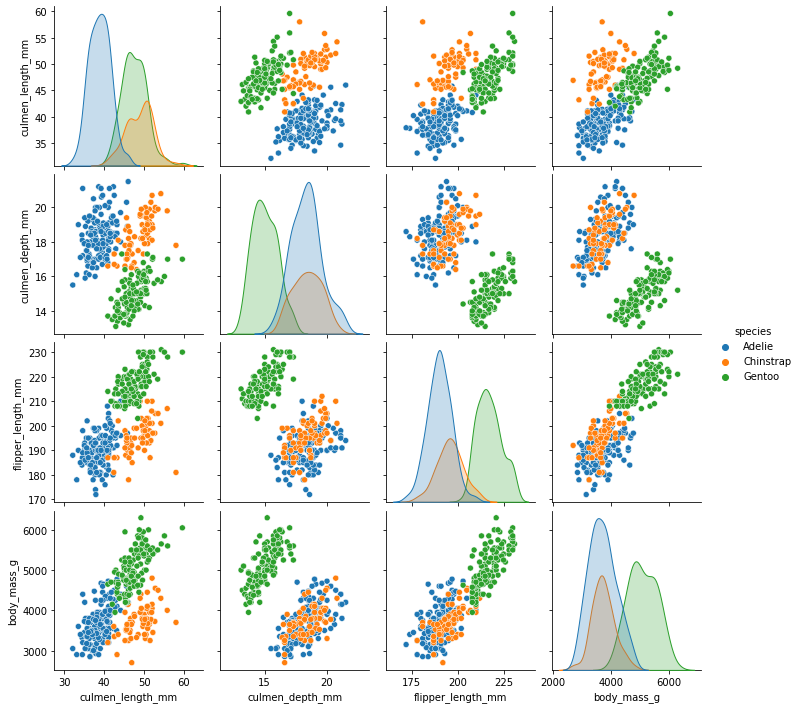

In [14]:
sns.pairplot(df,hue='species')

In [15]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [18]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      Adelie       0.98      0.91      0.94        44
   Chinstrap       0.83      0.95      0.88        20
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.95       101
   macro avg       0.93      0.95      0.94       101
weighted avg       0.95      0.95      0.95       101



In [24]:
confusion_matrix(y_pred,y_test)

array([[40,  4,  0],
       [ 1, 19,  0],
       [ 0,  0, 37]], dtype=int64)

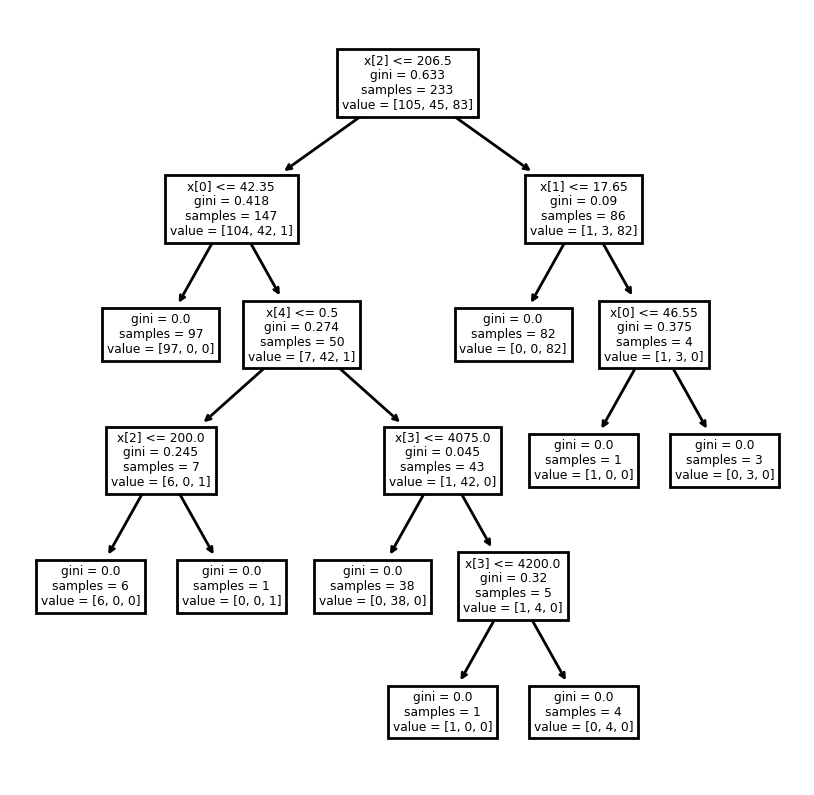

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5),dpi=200)
plot_tree(model)
plt.show()

In [30]:
def report_model(model):
    model_preds=model.predict(X_test)
    print(classification_report(model_preds,y_test))
    print('\n')
    plt.figure(figsize=(4,4),dpi=200)
    plot_tree(model);

In [41]:
pruned_model=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
grid_params={'max_depth':[2,3,4,5],'max_features':[3,6,9,12],'max_leaf_nodes':[1,2,3,4,5]}
grid=GridSearchCV(pruned_model,grid_params)
grid.fit(X_train,y_train)
report_model(grid)

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.87      0.95      0.91        21
      Gentoo       1.00      0.93      0.96        40

    accuracy                           0.95       101
   macro avg       0.94      0.95      0.94       101
weighted avg       0.95      0.95      0.95       101





C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.p

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [3, 6, 9, 12],
                         'max_leaf_nodes': [1, 2, 3, 4, 5]}) instead.

<Figure size 800x800 with 0 Axes>

In [42]:
grid.best_params_

{'max_depth': 4, 'max_features': 6, 'max_leaf_nodes': 4}